In [4]:
import ROOT

In [5]:
bn_edges = [0.66,0.88,0.935,1]
files = ["Mh_purityPerBin_z0.66-0.88.root","Mh_purityPerBin_z0.88-0.935.root","Mh_purityPerBin_z0.935-1.root"]

In [9]:
def jitter_graph_x(graph, dx):
    x_vals = [graph.GetX()[i] for i in range(graph.GetN())]
    y_vals = [graph.GetY()[i] for i in range(graph.GetN())]
    for i in range(len(x_vals)):
        graph.SetPoint(i,x_vals[i]+dx,y_vals[i])

In [10]:
f0 = ROOT.TFile(files[0],"READ")
f1 = ROOT.TFile(files[1],"READ")
f2 = ROOT.TFile(files[2],"READ")
f0.ls()
f1.ls()
f2.ls()

    

TFile**		Mh_purityPerBin_z0.66-0.88.root	
 TFile*		Mh_purityPerBin_z0.66-0.88.root	
  KEY: TGraphErrors	Graph;1	
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.
TFile**		Mh_purityPerBin_z0.88-0.935.root	
 TFile*		Mh_purityPerBin_z0.88-0.935.root	
  KEY: TGraphErrors	Graph;1	
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.
TFile**		Mh_purityPerBin_z0.935-1.root	
 TFile*		Mh_purityPerBin_z0.935-1.root	
  KEY: TGraphErrors	Graph;1	
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.


In [11]:
g0 = f0.Get("Graph")
g1 = f1.Get("Graph")
g2 = f2.Get("Graph")
jitter_amount = 0.005
jitter_graph_x(g0,-jitter_amount)
jitter_graph_x(g1,0.0)
jitter_graph_x(g2,jitter_amount)

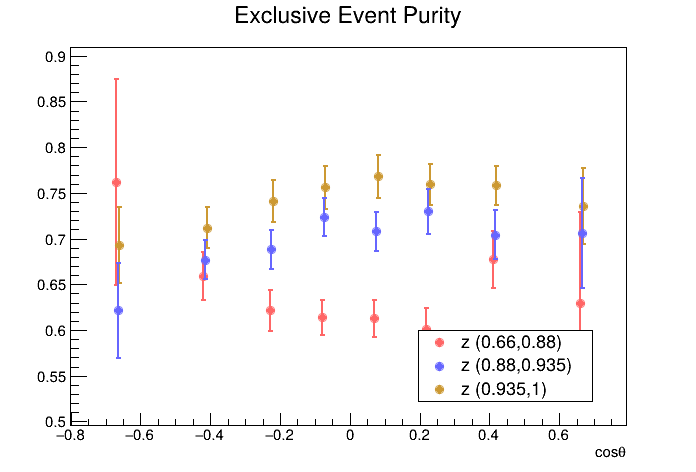

In [15]:
c = ROOT.TCanvas()
g0.SetLineColor(ROOT.kRed-7)
g0.SetMarkerColor(ROOT.kRed-7)
g0.SetTitle("Exclusive Event Purity")
g1.GetYaxis().SetRangeUser(0.45,0.9)
g2.SetLineColor(ROOT.kOrange-5)
g2.SetMarkerColor(ROOT.kOrange-5)
g1.SetLineColor(ROOT.kBlue-7)
g1.SetMarkerColor(ROOT.kBlue-7)

leg = ROOT.TLegend(0.6,0.15,0.85,0.3)
leg.AddEntry(g0,f"z ({bn_edges[0]},{bn_edges[1]})","p")
leg.AddEntry(g1,f"z ({bn_edges[1]},{bn_edges[2]})","p")
leg.AddEntry(g2,f"z ({bn_edges[2]},{bn_edges[3]})","p")


g0.Draw("AP")
g2.Draw("P SAME")
g1.Draw("P SAME")
leg.Draw()
c.Draw()